In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as KNN

In [2]:
# Performs k-fold cross validation on a given model for some X, y, k
def do_Kfold(model, X, y, k, scaler = None, randomState = 146):
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=k, random_state = randomState, shuffle=True)
    train_scores = []
    test_scores = []

    # Test model on each split
    for idxTrain, idxTest in kf.split(X):
        XTrain = X[idxTrain, :]
        XTest = X[idxTest, :]
        yTrain = y[idxTrain]
        yTest = y[idxTest]

        # Apply scalar if necessary
        if scaler != None:
            XTrain = scaler.fit_transform(XTrain)
            XTest = scaler.transform(XTest)

        # Fit model
        model.fit(XTrain,yTrain)

        # Record scores for fitted model
        train_scores.append(model.score(XTrain,yTrain))
        test_scores.append(model.score(XTest,yTest))
        
    # Return scores for k-fold
    return train_scores, test_scores

In [3]:
# Import and preview data set
data = pd.read_csv("sanitized_data/sanitized_data_2024-04-17_10-31-46-218385_mapped.csv")
data.head()

,Website,Time,Length,Protocol,Info
0,0,5.869593,66,1,4
1,0,5.881211,66,1,1
2,0,5.887175,54,1,6
3,0,5.887292,712,0,12
4,0,5.902131,1490,0,8


In [4]:
# Separate data set using test/train split
XTrain, XTest, yTrain, yTest = tts(data.drop(columns = ['Website']).values, data['Website'].values, random_state = 201, shuffle = True, test_size = 0.20)

In [5]:
# Perform k-fold to optimize k hyperparameter
neighborRange = np.array(range(1, 20))

# Hold k-fold result for each possible k neighbor value
train=[]
test=[]

# k-fold value
k = 10

# Perform k-fold for each possible hyperparameter value
for neighbor in neighborRange:
    knn = KNN(n_neighbors=neighbor)
    trainResult, testResult = do_Kfold(knn, XTrain, yTrain, k)
    
    train.append(np.mean(trainResult))
    test.append(np.mean(testResult))

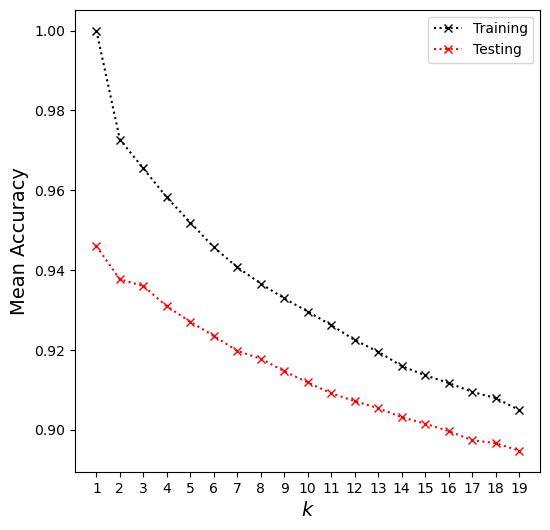

In [6]:
plt.figure(figsize=(6,6))
plt.plot(neighborRange, train, ':xk', label='Training')
plt.plot(neighborRange, test, ':xr', label='Testing')
plt.ylabel('Mean Accuracy', fontsize=14)
plt.xlabel('$k$',fontsize=14)
plt.xticks(neighborRange)
plt.legend()
plt.show()

In [7]:
# Get optimal hyperparameter for KNN
maxIndex = test == np.max(test)
print(neighborRange[maxIndex])
print(np.max(test))
print(np.max(train))

[1]
0.945985221674877
1.0


In [8]:
# Final KNN model
knn = KNN(n_neighbors=1)
knn.fit(XTrain, yTrain)

KNeighborsClassifier(n_neighbors=1)

In [9]:
# Score model
knn.score(XTrain, yTrain)

1.0

In [10]:
knn.score(XTest, yTest)

0.9522214560141858